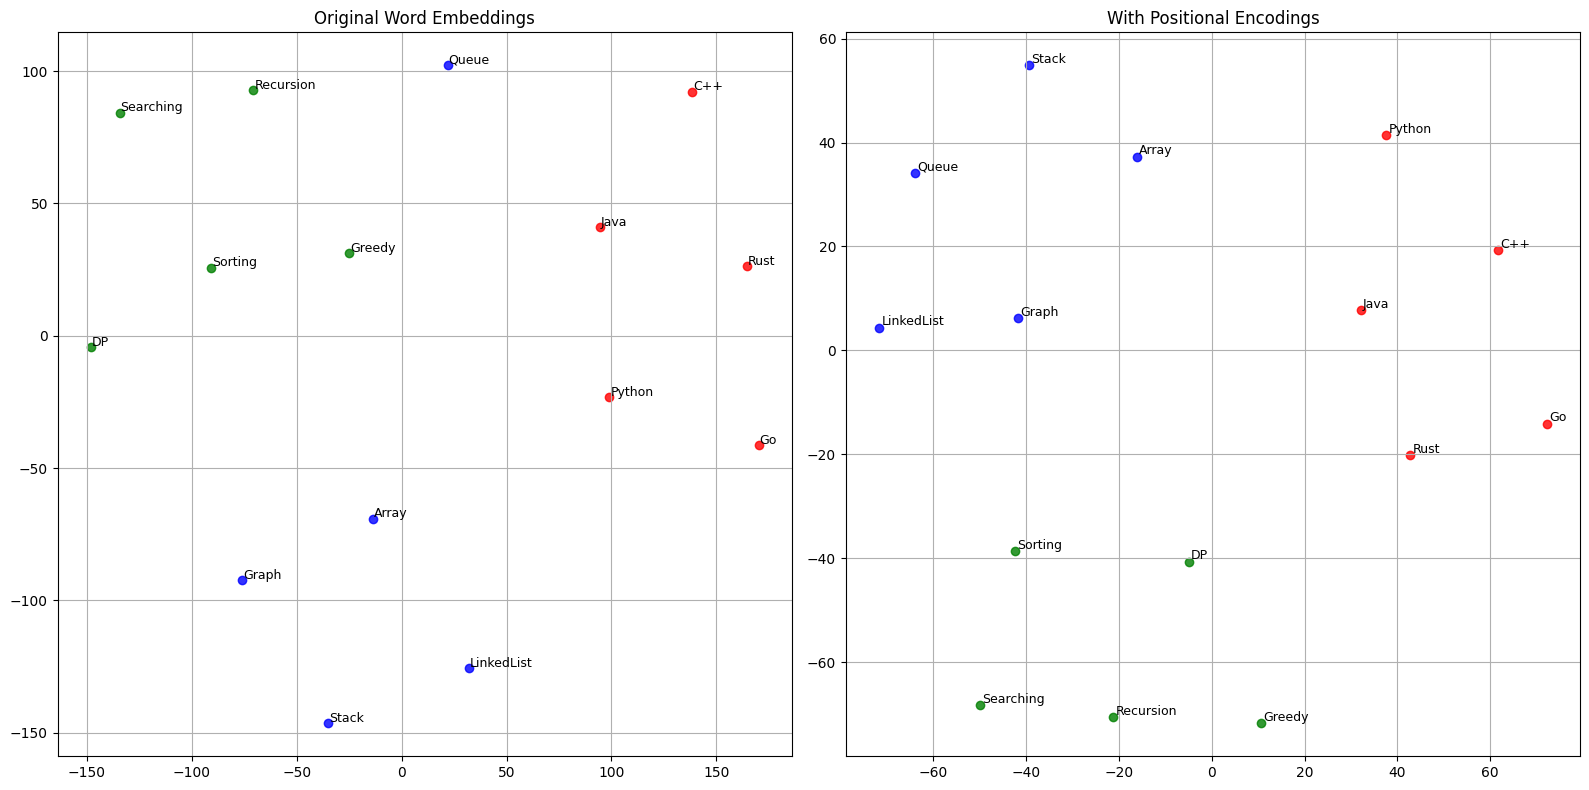

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 1. Define meaningful word categories and generate embeddings
word_categories = {
    "Programming Language": ["Python", "C++", "Java", "Rust", "Go"],
    "Data Structure": ["Array", "Stack", "Queue", "LinkedList", "Graph"],
    "Algorithm": ["Sorting", "Searching", "Recursion", "DP", "Greedy"],
}

word_embeddings = {}
# Generate cluster-based word embeddings
for category, words in word_categories.items():
    # Each category has a central vector
    cluster_center = np.random.rand(128)
    for word in words:
        # Add some variation to each word vector in the cluster
        word_embeddings[word] = cluster_center + np.random.normal(0, 0.3, 128)

# 2. Define the positional encoding function
def generate_positional_encoding(seq_len, dim):
    pe = np.zeros((seq_len, dim))
    for pos in range(seq_len):
        for i in range(0, dim, 2):
            denominator = 10000 ** (2 * i / dim)
            pe[pos, i] = np.sin(pos / denominator)
            if i + 1 < dim:
                pe[pos, i + 1] = np.cos(pos / denominator)
    return pe

# 3. Add positional encodings to the word embeddings
words = list(word_embeddings.keys())
embeddings_matrix = np.array([word_embeddings[w] for w in words])
seq_len = len(word_embeddings)
dim = 128

positional_encoding = generate_positional_encoding(seq_len, dim)
combined_embeddings = embeddings_matrix + positional_encoding

# 4. Reduce dimensionality for plotting using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced_vectors_original = tsne.fit_transform(embeddings_matrix)
reduced_vectors_combined = tsne.fit_transform(combined_embeddings)

# 5. Set up for plotting
category_colors = {
    "Programming Language": "red",
    "Data Structure": "blue",
    "Algorithm": "green",
}
# Create a mapping from word to its category for easy color lookup
word_to_category = {word: cat for cat, word_list in word_categories.items() for word in word_list}


# 6. Plot the results side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot Original Word Embeddings
axes[0].set_title("Original Word Embeddings")
for i, word in enumerate(words):
    category = word_to_category[word]
    color = category_colors[category]
    x, y = reduced_vectors_original[i, :]
    axes[0].scatter(x, y, color=color, alpha=0.8)
    axes[0].text(x + 0.5, y + 0.5, word, fontsize=9)
axes[0].grid(True)

# Plot Embeddings with Positional Encoding
axes[1].set_title("With Positional Encodings")
for i, word in enumerate(words):
    category = word_to_category[word]
    color = category_colors[category]
    x, y = reduced_vectors_combined[i, :]
    axes[1].scatter(x, y, color=color, alpha=0.8)
    axes[1].text(x + 0.5, y + 0.5, word, fontsize=9)
axes[1].grid(True)

plt.tight_layout()
plt.show()